In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
import yt
##yt.mylog.setLevel()
yt.utilities.logger.disable_stream_logging()

In [2]:
def quickProbePlot(tsPath,kv_int=2,kh_int=4, cx = 1e9/2, cy = 1e9/4, var='rhopert'):
    
    ts = yt.load(tsPath) # I'd love a way to make this quiet
    pointdata  = []
    time = []
    for ds in ts:
        pointdata.append(ds.point([cx, cy, 0.])[var].value[0])
        time.append(float(ds.current_time))
    
    
    gamma = 5./3. 
    g = 3e4
    H = 1e9
    N2 = (gamma-1.)/gamma * g / H
    kv = kv_int * np.pi  / H
    kh = kh_int * np.pi / H
    k2 = kv**2 + kh**2 
    w2 = N2 * kh**2 / (k2 )
    w = np.sqrt(w2)
    
    print('kh_int=',kh_int)
    print('N=',np.sqrt(N2))
    print('w(expected)=',w)

    smoothTime = np.linspace(0,1e4,1e3)
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(time, pointdata, '+r', time, pointdata, 'r',
        smoothTime, pointdata[0] * np.cos(-w * smoothTime), 'b')

    plt.show()
    
    return

In [3]:
def quickTimeDtPlot(tsPath):
    ts = yt.load(tsPath) # I'd love a way to make this quiet
    time = []
    for ds in ts:
        time.append(float(ds.current_time))

    dt = []
    for it, t in enumerate(time):
        try:
            dt.append(time[it+1]-t)
        except: # to avoid indexing oob on the last snapshot
            continue

    time.pop(); # remove the last element

    fig = plt.figure()
    ax = plt.axes()
    ax.plot(dt,'+')
    plt.xlabel('time step')
    plt.ylabel('dt')
    plt.show()

## No perturbation

kh_int= 4
N= 0.0034641016151377548
w(expected)= 0.0030983866769659332


/data/njt132/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


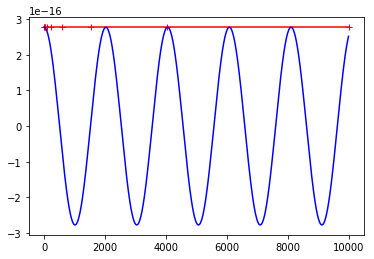

In [4]:
dataDir = '../oldruns/thu20/newgamma/amp0/'
baseName = 'plt'
dsPath = dataDir + baseName
tsPath = dsPath + '???????/'
ds0Path = dsPath + '0000000/'
quickProbePlot(tsPath,kv_int=2,kh_int=4,var='rhopert')

## $A=0.01$, autodt
this one outputted every ten steps so interpret the dt plot appropriately

kh_int= 4
N= 0.0034641016151377548
w(expected)= 0.0030983866769659332


/data/njt132/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


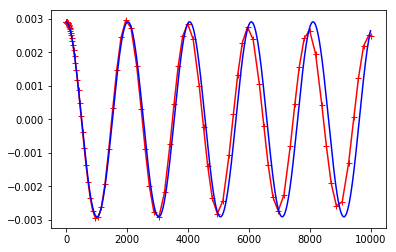

In [5]:
dataDir = '../oldruns/thu20/newgamma/amp0.01/autoDt/'
baseName = 'plt'
dsPath = dataDir + baseName
tsPath = dsPath + '???????/'
ds0Path = dsPath + '0000000/'
quickProbePlot(tsPath,kv_int=2,kh_int=4, var='rhopert')

## $A=0.01$, dtmax=100
this one outputted every step so take dt plot at face value

kh_int= 4
N= 0.0034641016151377548
w(expected)= 0.0030983866769659332


/data/njt132/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


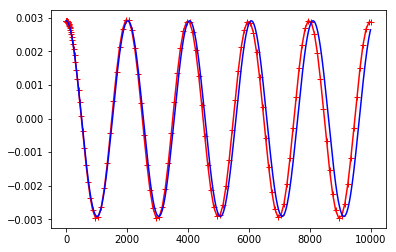

In [8]:
dataDir = '../oldruns/thu20/newgamma/amp0.01/dtmax100/'
baseName = 'plt'
dsPath = dataDir + baseName
tsPath = dsPath + '???????/'
ds0Path = dsPath + '0000000/'
quickProbePlot(tsPath,kv_int=2,kh_int=4, var='rhopert')

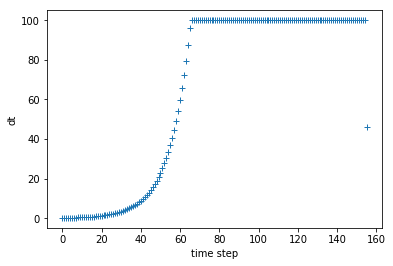

In [9]:
quickTimeDtPlot(tsPath)

## $A=0.01$, dtmax=10
this one outputted every step so take dt plot at face value

kh_int= 4
N= 0.0034641016151377548
w(expected)= 0.0030983866769659332


/data/njt132/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


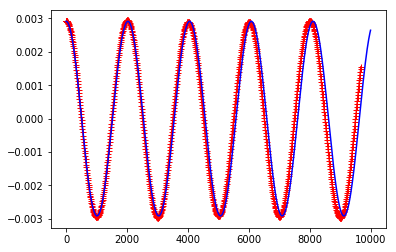

In [10]:
dataDir = '../oldruns/thu20/newgamma/amp0.01/dtmax10/'
baseName = 'plt'
dsPath = dataDir + baseName
tsPath = dsPath + '???????/'
ds0Path = dsPath + '0000000/'
quickProbePlot(tsPath,kv_int=2,kh_int=4, var='rhopert')

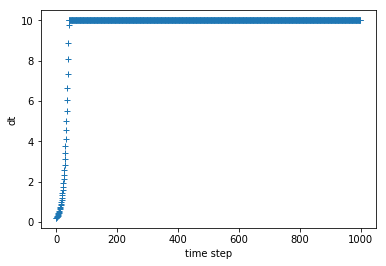

In [11]:
quickTimeDtPlot(tsPath)

## $A=0.01$, dtmax=1
this one outputted hundreden every step so be careful with dt plot

I also stopped it early when it was clear that it wasn't "fixed"

kh_int= 4
N= 0.0034641016151377548
w(expected)= 0.0030983866769659332


/data/njt132/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


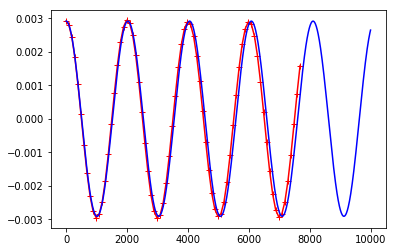

In [12]:
dataDir = '../oldruns/thu20/newgamma/amp0.01/dtmax1/'

baseName = 'plt'
dsPath = dataDir + baseName
tsPath = dsPath + '???????/'
ds0Path = dsPath + '0000000/'
quickProbePlot(tsPath,kv_int=2,kh_int=4, var='rhopert')

## $A=0.001$, autodt
this one output every step

kh_int= 4
N= 0.0034641016151377548
w(expected)= 0.0030983866769659332


/data/njt132/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


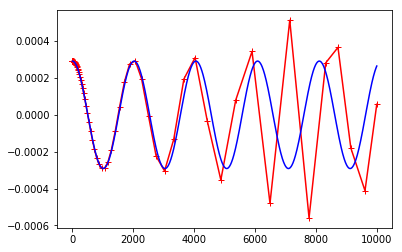

In [13]:
dataDir = '../oldruns/thu20/newgamma/amp0.001/autoDt/'

baseName = 'plt'
dsPath = dataDir + baseName
tsPath = dsPath + '???????/'
ds0Path = dsPath + '0000000/'
quickProbePlot(tsPath,kv_int=2,kh_int=4, var='rhopert')

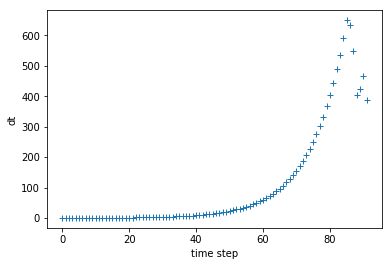

In [14]:
quickTimeDtPlot(tsPath)

## $A=0.001$, dt=1
this one output every hundred steps

kh_int= 4
N= 0.0034641016151377548
w(expected)= 0.0030983866769659332


/data/njt132/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


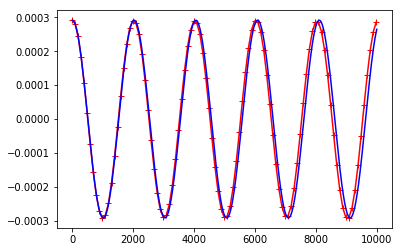

In [15]:
dataDir = '../oldruns/thu20/newgamma/amp0.001/dtmax1/'

baseName = 'plt'
dsPath = dataDir + baseName
tsPath = dsPath + '???????/'
ds0Path = dsPath + '0000000/'
quickProbePlot(tsPath,kv_int=2,kh_int=4, var='rhopert')